
# **Lab 2 - Data Preprocessing**

Data preprocessing can refer to manipulation or dropping of data before it is
used in order to ensure or enhance performance, and is an important step in the
data mining process. The phrase "garbage in, garbage out" is particularly appli-
cable to data mining and machine learning projects. Data-gathering methods are
often loosely controlled, resulting in out-of-range values (e.g., Income: -100),
impossible data combinations (e.g., Sex: Male, Pregnant: Yes), and missing val-
ues, etc. Analyzing data that has not been carefully screened for such problems
can produce misleading results. Thus, the representation and quality of data is
first and foremost before running any analysis.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

## **Loading the dataset**

The dataset for today can be found in this [URL](https://drive.google.com/file/d/1-FWxPlHngZqZ604_u5AbY7spo8CMYfDf/view?usp=sharing)

Here we are using the function read_csv to load our dataset into a Pandas DataFrame.

A DataFrame is the most common Structured API and simply represents a table of data with rows and columns. The list of columns and the types in those columns the schema. A simple analogy would be a spreadsheet with named columns. The fundamental difference is that while a spreadsheet sits on one computer in one specific location, a Spark DataFrame can span thousands of computers. The reason for putting the data on more than one computer should be intuitive: either the data is too large to fit on one machine or it would simply take too long to perform that computation on one machine.

In [3]:
# load the dataset
df = pd.read_csv('/content/drive/MyDrive/23. sensor_readings_24 (1).csv')

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 5456 rows and 25 columns.


In [4]:
df.head(10)

,US1,US2,US3,US4,US5,US6,US7,US8,US9,US10,...,US16,US17,US18,US19,US20,US21,US22,US23,US24,Class
0,0.438,0.498,3.625,3.645,5.0,2.918,5.000,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.0,2.918,5.000,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.0,2.918,5.000,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.0,2.918,5.000,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.0,2.918,5.000,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn
5,0.439,0.498,3.626,3.629,5.0,2.918,5.000,2.633,2.334,2.645,...,0.589,0.502,0.493,0.504,0.446,0.431,0.444,0.444,0.430,Slight-Right-Turn
6,0.440,5.000,3.627,3.628,5.0,2.919,3.028,2.346,2.330,2.638,...,0.588,0.501,0.492,0.504,0.451,0.433,0.446,0.444,0.432,Slight-Right-Turn
7,0.444,5.021,3.631,3.634,5.0,2.919,5.000,2.626,2.327,2.638,...,0.595,0.500,0.491,0.503,0.453,0.436,0.448,0.444,0.436,Slight-Right-Turn
8,0.451,5.025,3.635,3.639,5.0,2.920,3.027,2.620,2.323,2.632,...,0.595,0.499,0.491,0.502,0.457,0.440,0.453,0.454,0.442,Sharp-Right-Turn
9,0.458,5.022,3.640,3.644,5.0,2.922,5.000,2.346,2.321,2.628,...,0.590,0.496,0.490,0.498,0.462,0.444,0.458,0.461,0.449,Sharp-Right-Turn


## **Describing the dataset**

Let's explore our dataset a bit by desribing the numerical fields of our dataset.

In [5]:
df.describe()

,US1,US2,US3,US4,US5,US6,US7,US8,US9,US10,...,US15,US16,US17,US18,US19,US20,US21,US22,US23,US24
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.471617,2.327043,2.489347,2.796501,2.958552,2.893073,3.351113,2.540397,3.125621,2.832386,...,2.205772,1.202111,0.989831,0.910273,1.05811,1.076320,1.015923,1.778034,1.555045,1.578508
std,0.802801,1.410146,1.247435,1.309368,1.339225,1.282575,1.413692,1.111554,1.356965,1.307843,...,1.715435,1.098568,0.942075,0.889527,1.14463,1.141498,0.887439,1.571686,1.291447,1.150480
min,0.400000,0.437000,0.470000,0.833000,1.120000,1.114000,1.122000,0.859000,0.836000,0.810000,...,0.495000,0.424000,0.373000,0.354000,0.34000,0.355000,0.380000,0.370000,0.367000,0.377000
25%,0.921000,1.362000,1.538750,1.731000,1.774000,1.785750,1.930750,1.618000,1.799750,1.636000,...,0.860000,0.690000,0.581000,0.529750,0.52300,0.541750,0.567000,0.743000,0.792000,0.884000
50%,1.335000,1.904500,2.064000,2.458000,2.667000,2.682500,3.225500,2.172000,2.802000,2.679000,...,1.328500,0.803000,0.738000,0.685000,0.69100,0.693000,0.764000,1.030500,1.071000,1.289000
75%,1.814000,2.681500,2.739250,4.093500,4.314500,3.835250,5.000000,3.193000,5.000000,3.526250,...,4.436250,1.159000,0.913000,0.837000,0.85700,0.863000,1.002250,2.068250,1.559500,1.657250
max,5.000000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.022000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


## **Finding missing values**

In python finding missing values in a dataset is just calling an one line function. The code below displays all rows of data that has one or more columns that are empty/NaN i.e. not a number.

Here, axis = 1 indicates that we are checking the dataset by each row, i.e. horizontally. any indicates that it may be present in any column of the dataset.

In [6]:
missing_values = df[pd.isnull(df).any(axis=1)]

Let's take a look at the missing data:

In [7]:
missing_values

,US1,US2,US3,US4,US5,US6,US7,US8,US9,US10,...,US16,US17,US18,US19,US20,US21,US22,US23,US24,Class


**Success**, no more NaN values!

## **Finding outliers**

### **Histograms**

One graphical method for identifying outliers for numeric variables is to exam-
ine a histogram of the variable. Figure below shows a histogram generated of the
vehicle weights from the cars data set. There appears to be one lonely vehicle in the extreme left tail of the distribution, with a vehicle weight in the hundreds of pounds rather than in the thousands.

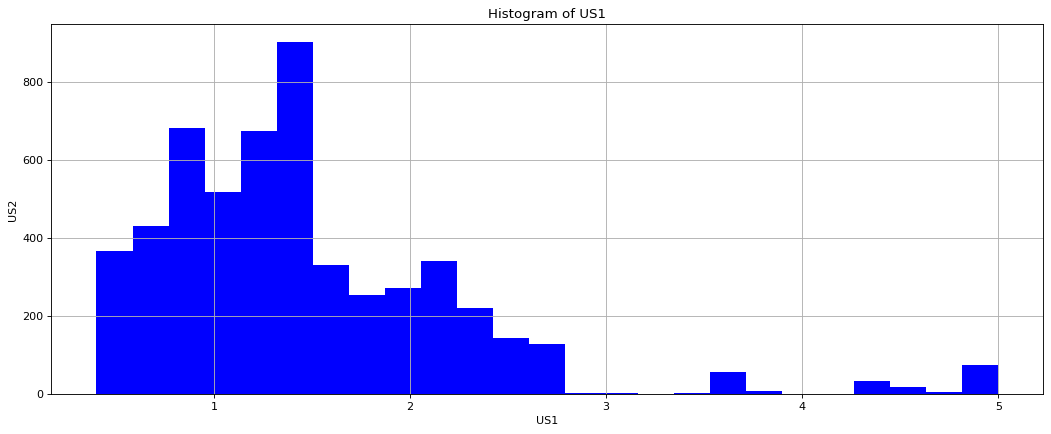

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter

figure(figsize=(16, 6), dpi=80)

# the histogram of the data
plt.hist(df['US1'],25, facecolor='b')

plt.xlabel('US1')
plt.ylabel('US2')
plt.title('Histogram of US1')
plt.grid(True)
plt.show()

### **Scatterplots**

Sometimes two-dimensional scatter plots can help to reveal outliers in more than
one variable. The scatter plot of mpg against weightlbs shown in Figure 6 seems
to have netted two outliers.

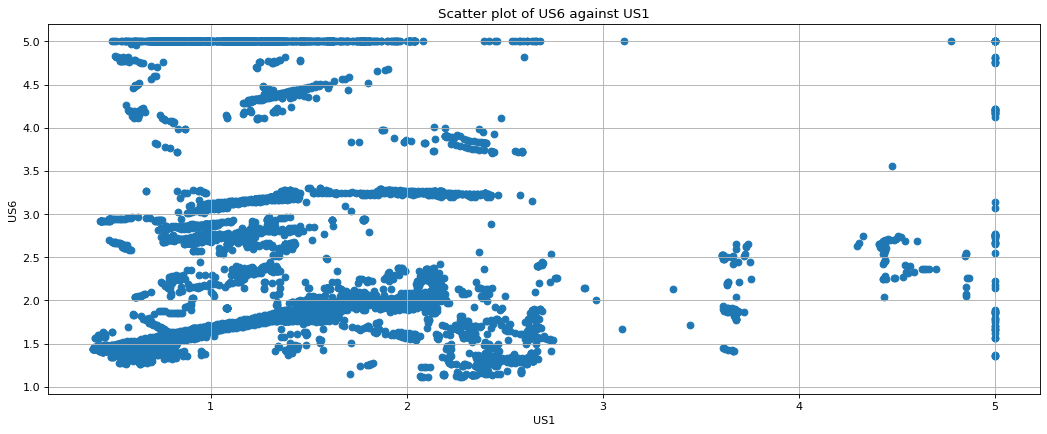

In [10]:
figure(figsize=(16, 6), dpi=80)

plt.scatter(df['US1'], df['US6'])

plt.xlabel('US1')
plt.ylabel('US6')

plt.title('Scatter plot of US6 against US1')

plt.grid(True)
plt.show()

## **Data Transformation**

Variables tend to have ranges that vary greatly from each other. For example, if
we are interested in major league baseball, players’ batting averages will range
from zero to less than 0.400, while the number of home runs hit in a season
will range from zero to around 70. For some data mining algorithms, such
differences in the ranges will lead to a tendency for the variable with greater
range to have undue influence on the results.

Therefore, data miners should normalize their numerical variables, to standardize the scale of effect each variable has on the results. There are several techniques for normalization, and we shall examine two of the more prevalent methods. Let X refer to our original field value and X* refer to the normalized field value.

### **Min-Max Normalization**

Min–max normalization works by seeing how much greater the ﬁeld value is than the minimum value min(X) and scaling this difference by the range. That is,

\begin{equation}
X^{*} = \frac{X-min(x)}{range(X)} = \frac{X-min(X)}{max(X)-min(X)}
\end{equation}

For example, consider the acceleration variable from the cars data set, which
measures how long (in seconds) each automobile takes to reach 60 miles per hour.
Let’s ﬁnd the min–max normalization for three automobiles having times-to-60 of 8,
15.548, seconds, and 25 seconds, respectively.

Let's check the current condition of the field before any normalization:

In [11]:
df['US17'].describe()

count    5456.000000
mean        0.989831
std         0.942075
min         0.373000
25%         0.581000
50%         0.738000
75%         0.913000
max         5.000000
Name: US17, dtype: float64

Let's apply the equation that we have formulated for finding the normalized value:

In [12]:
normalized_df = df.copy()

normalized_df['US17']=(df['US17']-df['US17'].min())/(df['US17'].max()-df['US17'].min())

Let's check the normalized value for the column acceleration:


In [13]:
normalized_df['US17'].describe()

count    5456.000000
mean        0.133311
std         0.203604
min         0.000000
25%         0.044954
50%         0.078885
75%         0.116706
max         1.000000
Name: US17, dtype: float64

### **Z-Score Standardization**

Z-score standardization, which is very widespread in the world of statistical analysis, works by taking the difference between the ﬁeld value and the ﬁeld mean value and scaling this difference by the standard deviation of the ﬁeld values. That is,

\begin{equation}
    X^{*} = \frac{X-mean(x)}{SD(X)}
\end{equation}

For example, consider the acceleration variable from the cars data set, which
measures how long (in seconds) each automobile takes to reach 60 miles per hour.
Let’s ﬁnd the min–max normalization for three automobiles having times-to-60 of 8,
15.548, seconds, and 25 seconds, respectively.

In [14]:
standardized_df = df.copy()

standardized_df['US17']=(df['US17']-df['US17'].mean())/(df['US17'].std())

To summarize, Z-score standardization values will usually range between –4
and 4, with the mean value having a Z-score standardization of zero. Figure
8 is a histogram of the time-to-60 variable after the Z-score standardization of
each field value. Note that the distribution is centered about zero and that the
minimum and maximum agree with what we found above.

In [15]:
standardized_df['US17'].describe()

count    5.456000e+03
mean     3.906943e-17
std      1.000000e+00
min     -6.547583e-01
25%     -4.339691e-01
50%     -2.673157e-01
75%     -8.155549e-02
max      4.256741e+00
Name: US17, dtype: float64

## **NUMERICAL METHODS FOR IDENTIFYING OUTLIERS**

One method of using statistics to identify outliers is to use Z-score standard-
ization. Often, an outlier can be identified because it is much farther than 3
standard deviations from the mean and therefore has a Z-score standardization
that is either less than -3 or greater than 3. Field values with Z-scores much
beyond this range probably bear further investigation to verify that they do not
represent data entry errors or other issues. For example, the vehicle that takes
its time (25 seconds) getting to 60 mph had a Z-score of 3.247. This value is
greater than 3 (although not by much), and therefore this vehicle is identified by
this method as an outlier. The data analyst may wish to investigate the validity
of this data value or at least suggest that the vehicle get a tune-up!

### **Interquartile range**

The quartiles of a data set divide the data set into four parts, each containing 25\% of the data.

* The ﬁrst quartile (Q1) is the 25th percentile.
* The second quartile (Q2) is the 50th percentile, that is, the median.
* item The third quartile (Q3) is the 75th percentile.

The interquartile range (IQR) is a measure of variability that is much more robust than the standard deviation. The IQR is calculated as IQR = Q3 - Q1 and may be interpreted to represent the spread of the middle 50\% of the data.

In [16]:
df['US17'].describe()

count    5456.000000
mean        0.989831
std         0.942075
min         0.373000
25%         0.581000
50%         0.738000
75%         0.913000
max         5.000000
Name: US17, dtype: float64

### **Outlier detection**

A robust measure of outlier detection is therefore defined as follows. A data
value is an outlier if:
* It is located 1.5(IQR) or more below Q1, or
* It is located 1.5(IQR) or more above Q3.

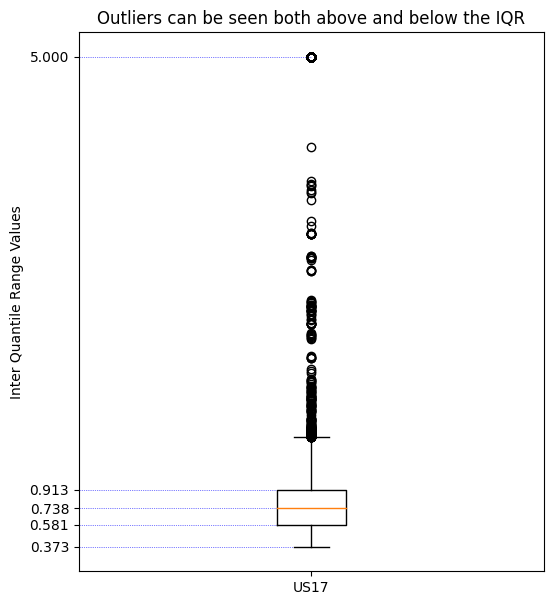

In [17]:
import numpy as np
import matplotlib.pylab as plt


fig = plt.figure(1, figsize=(6, 7))
ax = fig.add_subplot(111)

ax.set_title('Outliers can be seen both above and below the IQR')

ax.boxplot(df['US17'], vert=True, manage_ticks=True)
ax.set_ylabel('Inter Quantile Range Values')
# ax.set_yticklabels(['Min','Q1','Median', 'Q3','Max'])
ax.set_xticklabels(['US17'])

quantiles = np.quantile(df['US17'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))

ax.hlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax.set_xlim(0.5, 1.5)
ax.set_yticks(quantiles)
plt.show()
